In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train_features.csv')
val_df = pd.read_csv('validation_features.csv')

In [2]:
# Remove empty column '190'
train_df = train_df.drop(columns=['190'])
val_df = val_df.drop(columns=['190'])

In [3]:
# Separate features and labels
X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

X_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on the validation set
val_predictions = rf_model.predict(X_val)

# Classification report
print(classification_report(y_val, val_predictions, digits=4, target_names=['Fake', 'Real']))

              precision    recall  f1-score   support

        Fake     0.9766    0.9752    0.9759      1413
        Real     0.9753    0.9766    0.9760      1413

    accuracy                         0.9759      2826
   macro avg     0.9759    0.9759    0.9759      2826
weighted avg     0.9759    0.9759    0.9759      2826



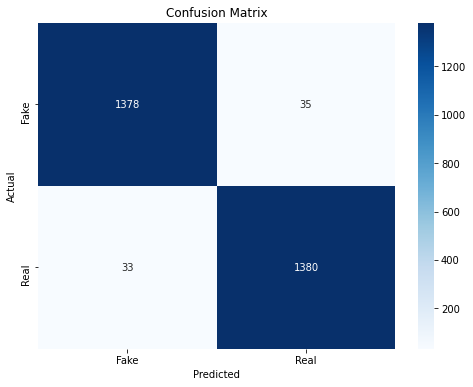

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion matrix
cm = confusion_matrix(y_val, val_predictions)

# Labels for confusion matrix
labels = ['Fake', 'Real']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
import numpy as np

# Confusion matrix values for binary classification (Fake: class 0, Real: class 1)
tn, fp, fn, tp = cm.ravel()

# Functions for metrics
def accuracy(tn, fp, fn, tp):
    return (tp + tn) / (tp + tn + fp + fn)

def error_rate(tn, fp, fn, tp):
    return (fp + fn) / (tp + tn + fp + fn)

def sensitivity(tp, fn):
    return tp / (tp + fn)

def specificity(tn, fp):
    return tn / (tn + fp)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp, fn):
    return tp / (tp + fn)

def f_measure(precision, recall):
    return (2 * precision * recall) / (precision + recall)

def geometric_mean(tp, tn):
    return np.sqrt(tp * tn)

In [13]:
# Metrics for "Real" class (Positive class)
real_acc = accuracy(tn, fp, fn, tp)
real_err = error_rate(tn, fp, fn, tp)
real_sn = sensitivity(tp, fn)
real_sp = specificity(tn, fp)
real_p = precision(tp, fp)
real_r = recall(tp, fn)
real_f1 = f_measure(real_p, real_r)
real_gm = geometric_mean(tp, tn)

In [16]:
# Display Real class metrics
print("\n=== Real Class (Positive) Metrics ===")
print(f"Accuracy: {real_acc:.4f}")
print(f"Error Rate: {real_err:.4f}")
print(f"Sensitivity: {real_sn:.4f}")
print(f"Specificity: {real_sp:.4f}")
print(f"Precision: {real_p:.4f}")
print(f"Recall: {real_r:.4f}")
print(f"F-Measure: {real_f1:.4f}")
print(f"Geometric Mean: {real_gm:.4f}")


=== Real Class (Positive) Metrics ===
Accuracy: 0.9759
Error Rate: 0.0241
Sensitivity: 0.9766
Specificity: 0.9752
Precision: 0.9753
Recall: 0.9766
F-Measure: 0.9760
Geometric Mean: 1378.9996


In [14]:
# Compute metrics for "Fake" class by inverting the confusion matrix (i.e., treating Fake as the positive class)
fake_tp, fake_fp, fake_fn, fake_tn = tn, fp, fn, tp

fake_acc = accuracy(fake_tn, fake_fp, fake_fn, fake_tp)
fake_err = error_rate(fake_tn, fake_fp, fake_fn, fake_tp)
fake_sn = sensitivity(fake_tp, fake_fn)
fake_sp = specificity(fake_tn, fake_fp)
fake_p = precision(fake_tp, fake_fp)
fake_r = recall(fake_tp, fake_fn)
fake_f1 = f_measure(fake_p, fake_r)
fake_gm = geometric_mean(fake_tp, fake_tn)

In [17]:
# Display Fake class metrics
print("\n=== Fake Class (Positive) Metrics ===")
print(f"Accuracy: {fake_acc:.4f}")
print(f"Error Rate: {fake_err:.4f}")
print(f"Sensitivity: {fake_sn:.4f}")
print(f"Specificity: {fake_sp:.4f}")
print(f"Precision: {fake_p:.4f}")
print(f"Recall: {fake_r:.4f}")
print(f"F-Measure: {fake_f1:.4f}")
print(f"Geometric Mean: {fake_gm:.4f}")


=== Fake Class (Positive) Metrics ===
Accuracy: 0.9759
Error Rate: 0.0241
Sensitivity: 0.9766
Specificity: 0.9753
Precision: 0.9752
Recall: 0.9766
F-Measure: 0.9759
Geometric Mean: 1378.9996


In [15]:
# Averaged metrics (simple average over both classes)
avg_acc = (real_acc + fake_acc) / 2
avg_err = (real_err + fake_err) / 2
avg_sn = (real_sn + fake_sn) / 2
avg_sp = (real_sp + fake_sp) / 2
avg_p = (real_p + fake_p) / 2
avg_r = (real_r + fake_r) / 2
avg_f1 = (real_f1 + fake_f1) / 2
avg_gm = (real_gm + fake_gm) / 2

In [18]:
# Display Average metrics
print("\n=== Averaged Metrics ===")
print(f"Average Accuracy: {avg_acc:.4f}")
print(f"Average Error Rate: {avg_err:.4f}")
print(f"Average Sensitivity: {avg_sn:.4f}")
print(f"Average Specificity: {avg_sp:.4f}")
print(f"Average Precision: {avg_p:.4f}")
print(f"Average Recall: {avg_r:.4f}")
print(f"Average F-Measure: {avg_f1:.4f}")
print(f"Average Geometric Mean: {avg_gm:.4f}")


=== Averaged Metrics ===
Average Accuracy: 0.9759
Average Error Rate: 0.0241
Average Sensitivity: 0.9766
Average Specificity: 0.9752
Average Precision: 0.9752
Average Recall: 0.9766
Average F-Measure: 0.9759
Average Geometric Mean: 1378.9996
